<a href="https://colab.research.google.com/github/HamnahJ99/lightkurve-exoplanet-ml-project/blob/main/project-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lightkurve
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 963.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 81.8 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=89094dbbc1da13c92c746df25f283cd4c3f4ed07f53419ced226010a9b41d02e
  Stored in directory: /root/.cache/pip/wheels/04/15/cd/2f622795b09e83471a3be5d2581cd9cf96a6ec7aa78e8deffe
  Created wheel for memoization:

/usr/local/lib/python3.12/dist-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

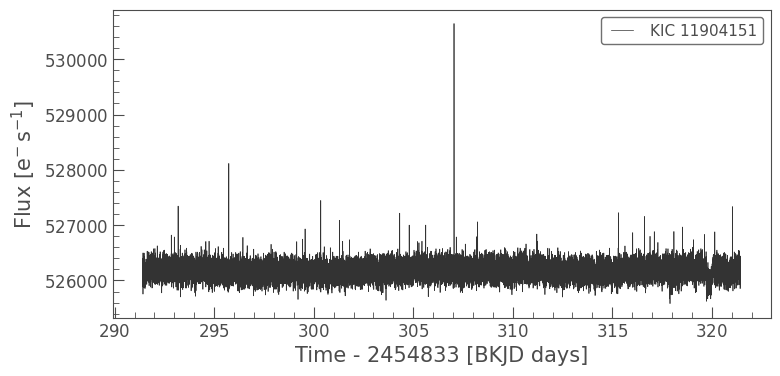

In [11]:
search_result = lk.search_lightcurve("Kepler-10")
#print(search_result)
lc_1 = search_result[2].download().remove_nans()
lc_1.plot()

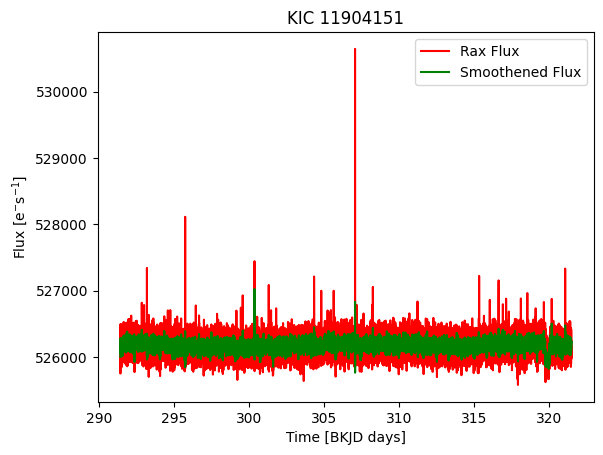

In [70]:
window_length = 13
poly_order = 3
time = lc_1['time'].value
flux = lc_1['pdcsap_flux']
y_smooth = savgol_filter(flux, window_length=window_length, polyorder=poly_order)

plt.plot(time, flux, color='red', label='Rax Flux')
plt.plot(time, y_smooth, color='green', label='Smoothened Flux')
plt.xlabel('Time [BKJD days]')
plt.ylabel('Flux [e$^{-}$s$^{-1}$]')
plt.title('KIC 11904151')
plt.legend()
plt.show()